## Verification

This process will expore the nc file, and it will try to veirify or compare results with the Ulf sites

In [30]:
import pandas as pd
from datetime import datetime
from susi_2022.susi.figures import *
from netCDF4 import Dataset
from glob import glob
import os

In [31]:
working_folder = 'outputs'
outpara = working_folder
scen = 0

files = glob(working_folder+'/*.nc')
pd.DataFrame(files)

,0
0,outputs\05_StraRed_susi.nc


In [32]:
ff = files[0]
print(ff)

wsite = os.path.basename(ff)
print(wsite)

outputs\05_StraRed_susi.nc
05_StraRed_susi.nc


In [33]:
wsite = '05_SträRed_susi.nc'
pFile = pd.read_excel("inputs\sweden\parameters.xlsx")

In [34]:
#pFile[wsite[:-8]]
start_date = pFile.loc[pFile['key']=='start_date', [wsite[:-8]] ].values[0]
start_date = start_date[0].strftime('%Y-%m-%d')

end_date = pFile.loc[pFile['key']=='end_date', [wsite[:-8]] ].values[0]
end_date = end_date[0].strftime('%Y-%m-%d')

In [35]:
end_date

'2016-12-31'

In [36]:
ff

'outputs\\05_StraRed_susi.nc'

In [37]:
ncf = Dataset('outputs\\05_StraRed_susi.nc', mode='r')

C:\Users\aoga0001\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


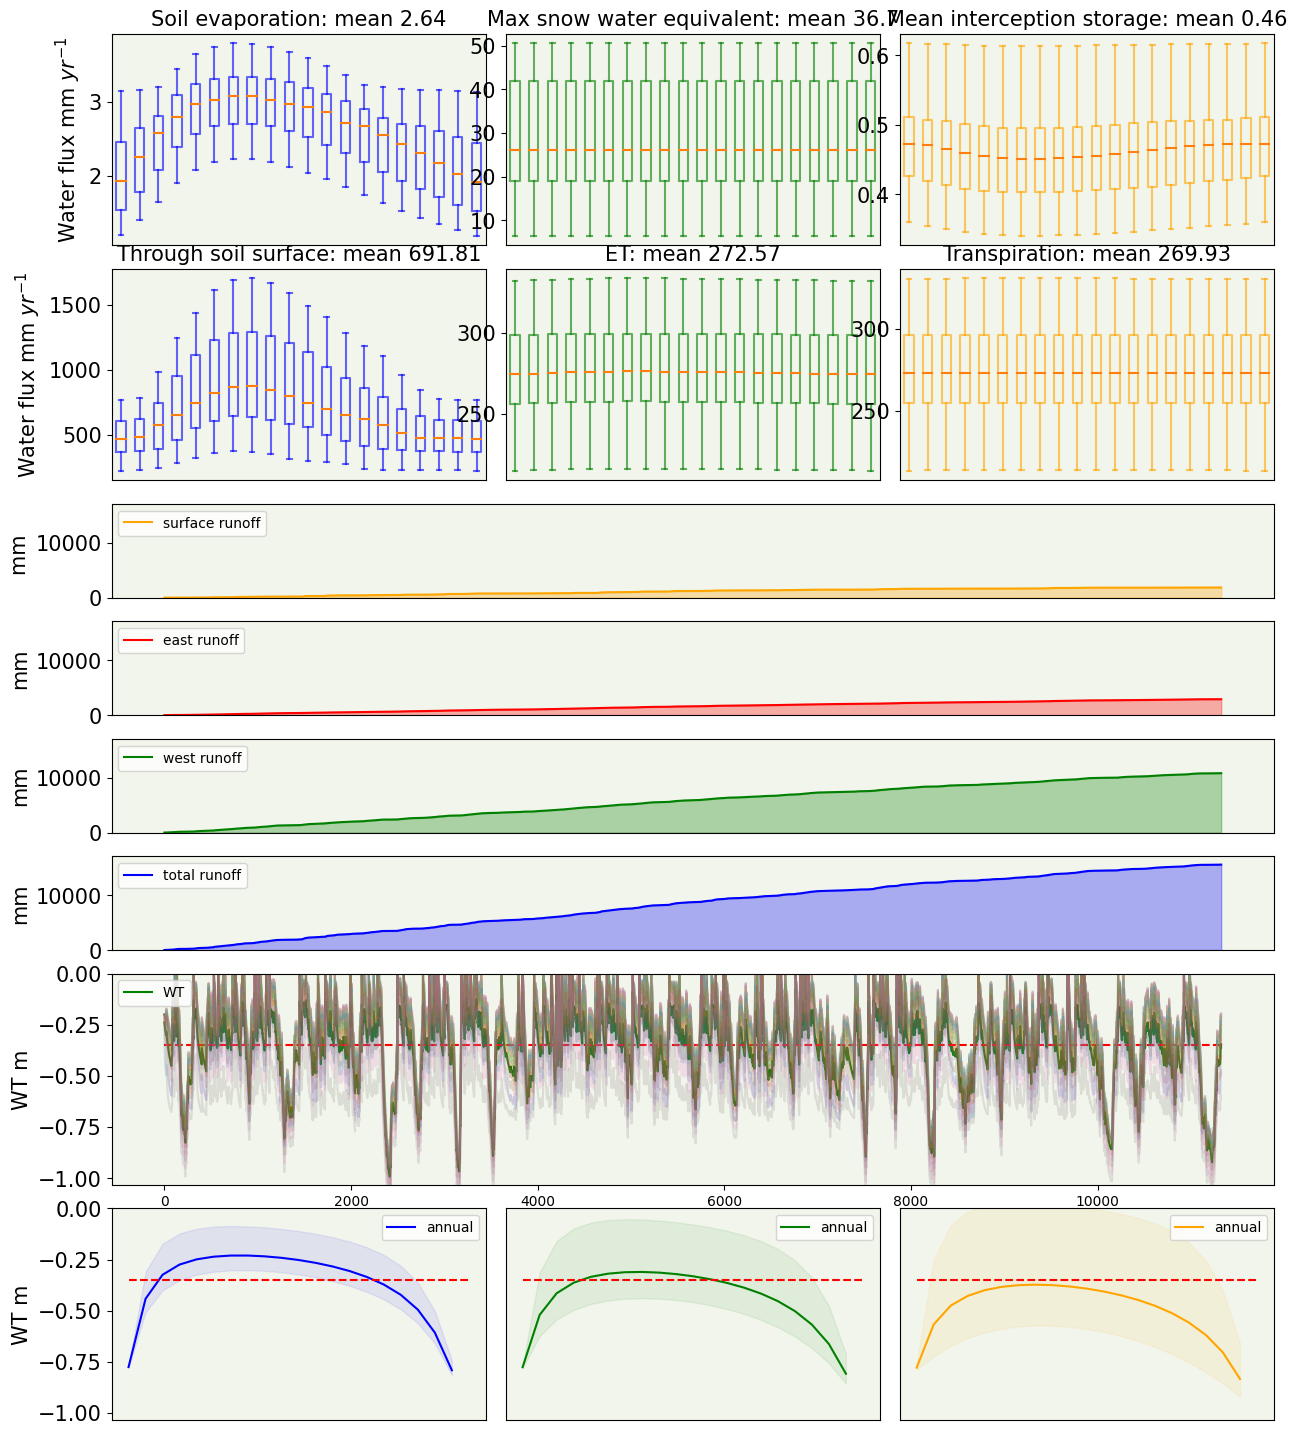

In [38]:
hydrology(ff, scen)
#stand(ff, scen)
#mass(ff, scen)
#carbon(ff, scen)
##compare_1(ff, [0,1])


In [39]:
# getting all the nc files in folder
  # reading one at once
  # 

In [40]:
print(ncf)
ncf['strip']['dwt'][scen,:, :]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Peatland simulator Susi results
    history: created 2023-03-02 20:57:21
    source: Susi v.2022,
    dimensions(sizes): nscens(2), ncols(20), nyrs(32), ndays(11323), nLyrs(30)
    variables(dimensions): float64 time(ndays)
    groups: scen, stand, groundvegetation, esom, fertilization, balance, cpy, strip, temperature, methane, export


masked_array(
  data=[[-0.775     , -0.2734012 , -0.21500143, ..., -0.20800093,
         -0.22043116, -0.26434273],
        [-0.775     , -0.3219    , -0.23156328, ..., -0.21684813,
         -0.2350318 , -0.27894336],
        [-0.775     , -0.35554463, -0.24624878, ..., -0.22514   ,
         -0.24668007, -0.2905916 ],
        ...,
        [-0.775     , -0.48984984, -0.3408976 , ..., -0.49689713,
         -0.6102344 , -0.775     ],
        [-0.775     , -0.49275512, -0.3441853 , ..., -0.50181156,
         -0.6148742 , -0.775     ],
        [-0.775     , -0.4709754 , -0.32101697, ..., -0.48196527,
         -0.598428  , -0.775     ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [41]:
ncf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Peatland simulator Susi results
    history: created 2023-03-02 20:57:21
    source: Susi v.2022,
    dimensions(sizes): nscens(2), ncols(20), nyrs(32), ndays(11323), nLyrs(30)
    variables(dimensions): float64 time(ndays)
    groups: scen, stand, groundvegetation, esom, fertilization, balance, cpy, strip, temperature, methane, export

In [42]:
ncf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Peatland simulator Susi results
    history: created 2023-03-02 20:57:21
    source: Susi v.2022,
    dimensions(sizes): nscens(2), ncols(20), nyrs(32), ndays(11323), nLyrs(30)
    variables(dimensions): float64 time(ndays)
    groups: scen, stand, groundvegetation, esom, fertilization, balance, cpy, strip, temperature, methane, export

In [43]:
# Uld data
# for verification
# Water table for selected station

obs_GWL = pd.read_csv(f'O:/projects/forestProductivity/01_data_acquisition/Ulf/SecondData/GVN_Man_ALL tidy by Alejandro Gandara.csv', encoding='latin1', sep=';')


obs_GWL = obs_GWL.loc[(obs_GWL.Transekt == 'mean') & (obs_GWL.site == wsite)][['site','date', 'wt']]
obs_GWL.set_index('date', drop=False, inplace=True)
obs_GWL_t = obs_GWL.reindex(pd.date_range(start_date, end_date).format("YYY%-mm%-dd%"), fill_value=None).iloc[1:]
obs_GWL = obs_GWL_t.combine_first(obs_GWL)
obs_GWL.date = obs_GWL.index
obs_GWL = obs_GWL[obs_GWL.date.notnull()]


# print(len(obs_GWL))
#obs_GWL[pd.notnull(obs_GWL['wt'])]

In [44]:
ncf['stand']['basalarea'][scen,:, :]

masked_array(
  data=[[22.80215 , 22.80215 , 22.80215 , 22.80215 , 22.80215 ,
         22.80215 , 22.80215 , 22.80215 , 22.80215 , 22.80215 ,
         22.80215 , 22.80215 , 22.80215 , 22.80215 , 22.80215 ,
         22.80215 , 22.80215 , 22.80215 , 22.80215 , 22.80215 ],
        [24.793097, 24.793098, 24.776567, 24.752449, 24.732527,
         24.718496, 24.712387, 24.712948, 24.718576, 24.727604,
         24.737648, 24.74648 , 24.757303, 24.769314, 24.784027,
         24.791706, 24.79299 , 24.792995, 24.792824, 24.79244 ],
        [25.294455, 25.259642, 25.191753, 25.07083 , 24.990583,
         24.942184, 24.922674, 24.925425, 24.944569, 24.974531,
         25.011858, 25.052639, 25.09454 , 25.137936, 25.189734,
         25.225103, 25.247787, 25.267973, 25.281761, 25.295902],
        [25.869396, 25.749163, 25.597364, 25.386135, 25.248587,
         25.170574, 25.139624, 25.143984, 25.17543 , 25.22651 ,
         25.291643, 25.364645, 25.4408  , 25.516163, 25.59846 ,
         25.666119, 25.

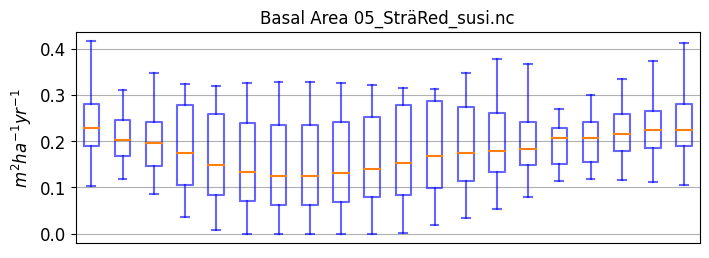

In [45]:
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt

facecolor = '#f2f5eb'
fs = 12
cols =ncf.dimensions['ncols'].size #20
fig = plt.figure(num='stand', figsize=(25,18))   #width, height
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)

ba = ncf['stand']['basalarea'][scen,:, :]
growth = np.diff(ba, axis=0)
dfgrowth = pd.DataFrame(data=growth, columns=list(range(cols)))
axgrowth = fig.add_subplot(gs[8:10, :4])
dfgrowth.boxplot(ax = axgrowth,
                color=dict(boxes='blue', whiskers='blue', medians='blue', caps='blue'),
                boxprops=dict(linestyle='-', linewidth=1.5, color='blue', alpha=0.6),
                flierprops=dict(linestyle='-', linewidth=1.5),
                medianprops=dict(linestyle='-', linewidth=1.5),
                whiskerprops=dict(linestyle='-', linewidth=1.5, color='blue', alpha=0.6),
                capprops=dict(linestyle='-', linewidth=1.5, color='blue', alpha=0.6),
                showfliers=False, grid=True, rot=2)

axgrowth.set_title('Basal Area ' + wsite)
axgrowth.set_ylabel('$m^2 ha^{-1} yr^{-1}$', fontsize=fs)

axgrowth.get_xaxis().set_visible(False)
axgrowth.tick_params(axis='y', labelsize=fs)
#axgrowth.set_facecolor(facecolor)
plt.savefig(working_folder+ '/graphs/' + wsite[:-8] + '_Basal Area.png', bbox_inches='tight')

In [46]:
# basal area
ba_mean = np.mean(ncf['stand']['basalarea'][scen,:, :], axis=1)
bai = np.diff(ba_mean, axis=0)

BasalArea = pd.DataFrame({
    'year': pd.date_range(start_date, end_date, freq="Y").strftime('%Y'),
    'ba':list(ba_mean)[1:],
    'bai':list(bai)
})
BasalArea.to_csv(working_folder+ '/' +  wsite[:-8] + '_Basal Area.csv')

#working_folder + '/graphs/' + wsite[:-8] +

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


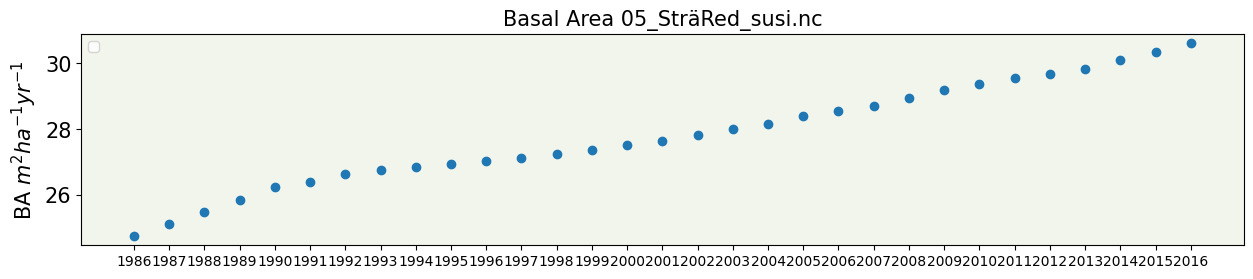

In [47]:
fs = 15
baFig = plt.figure(num='BasalArea', figsize=(15,18))
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)

axwtts = baFig.add_subplot(gs[8:10, :])
axwtts.scatter(x= BasalArea['year'], y=BasalArea['ba'])
axwtts.set_title('Basal Area ' + wsite, fontsize = 15)
axwtts.tick_params(axis='y', labelsize=fs)
axwtts.set_ylabel('BA $m^2 ha^{-1} yr^{-1}$', fontsize=fs)
axwtts.legend(loc= 'upper left')
axwtts.grid(visible=False)
axwtts.set_facecolor(facecolor)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


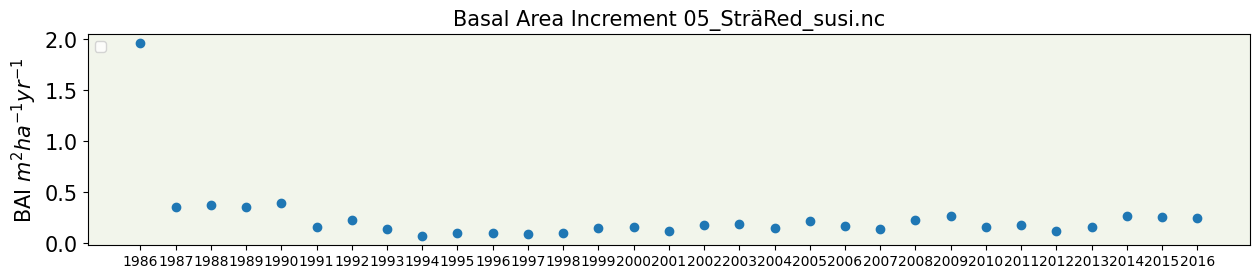

In [48]:
fs = 15
baFig = plt.figure(num='BasalArea', figsize=(15,18))
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)

axwtts = baFig.add_subplot(gs[8:10, :])
axwtts.scatter(x= BasalArea['year'], y=BasalArea['bai'])
axwtts.set_title('Basal Area Increment ' + wsite, fontsize = 15)
axwtts.tick_params(axis='y', labelsize=fs)
axwtts.set_ylabel('BAI $m^2 ha^{-1} yr^{-1}$', fontsize=fs)
axwtts.legend(loc= 'upper left')
axwtts.grid(visible=False)
axwtts.set_facecolor(facecolor)

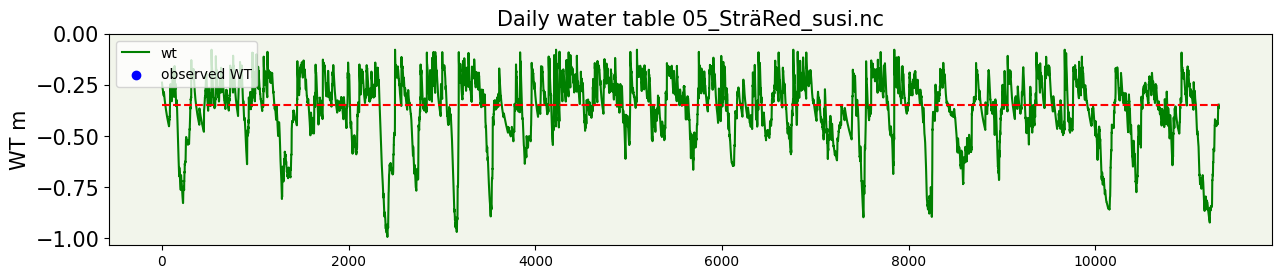

In [49]:
facecolor = '#f2f5eb'
fs = 15
fig = plt.figure(num='hydro', figsize=(15,18))   #width, height
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)

wt = np.mean(ncf['strip']['dwtyr'][scen,:, :], axis = 0)
cols = np.shape(wt)[0]
#wtgs = np.mean(ncf['strip']['dwtyr_growingseason'][scen,:, :], axis = 0)
#sdgs = np.std(ncf['strip']['dwtyr_growingseason'][scen,:, :], axis = 0)
wtls = np.mean(ncf['strip']['dwtyr_latesummer'][scen,:, :], axis = 0)
#sdls = np.std(ncf['strip']['dwtyr_latesummer'][scen,:, :], axis = 0)
wtmin = min(wtls) -0.2



#----------Water tables time series
wt = np.mean(ncf['strip']['dwt'][scen,:, :], axis = 1)
days = np.shape(wt)[0]
sd = np.std(ncf['strip']['dwt'][scen,:, :], axis = 1)# sdls = np.std(ncf['strip']['dwtyr_latesummer'][scen,:, :], axis = 0)

axwtts = fig.add_subplot(gs[8:10, :])
axwtts.plot(wt, color='green', label = 'wt')
axwtts.scatter(range(days), obs_GWL['wt'], color='blue', label = 'observed WT')


axwtts.hlines(y= -0.35, xmin=0, xmax = days, color='red',linestyles='--')
# for c in range(1,cols-1):
#     axwtts.plot(range(days), ncf['strip']['dwt'][scen,:, c], alpha=0.2)
    
#axwtts.get_xaxis().set_visible(False) 
axwtts.set_title('Daily water table ' + wsite, fontsize = 15)
axwtts.tick_params(axis='y', labelsize=fs)
axwtts.set_ylim([wtmin,0])
axwtts.set_ylabel('WT m', fontsize=fs)
axwtts.legend(loc= 'upper left')
axwtts.grid(visible=False)
axwtts.set_facecolor(facecolor)

plt.savefig(working_folder+ '/' +  wsite[:-8] + '_wt.png', bbox_inches='tight')

In [50]:
ncf.close()